In [16]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [17]:
#loading given dataset
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Finding the optimum number of clusters for K-Means classification

In [20]:
x=iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(init="k-means++",n_clusters=i,n_init=10,max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

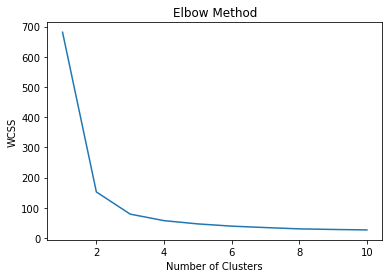

In [21]:
#optimum number of clusters would be obtained at the elbow point
#Let's plot a line graph of the results obtained and look for the elbow point
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [22]:
# At the optimum number of clusters the WCSS does not decrease significantly with each iteration
# The optimum number of cluster appears at the elbow point
# Therefore, it is visible that "3" being the elbow point should be equal to the optimum number 
# of clusters for this data

In [23]:
# Applying Kmeans to the dataset/ Creating Kmeans classifier
kmeans= KMeans(init="k-means++",n_clusters=3, n_init=10, max_iter=300, random_state=0)
y=kmeans.fit_predict(x)
#y represents the cluster label

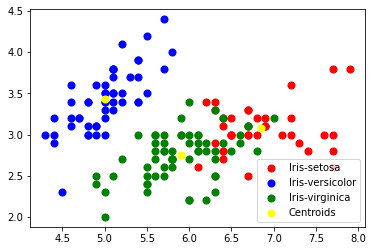

In [24]:
#Visualising the clusters: for the first two columns
plt.scatter(x[y==0,0], x[y==0,1], c="red", s=50, label="Iris-setosa")
plt.scatter(x[y==1,0], x[y==1,1], c="blue", s=50, label="Iris-versicolor")
plt.scatter(x[y==2,0], x[y==2,1], c="green", s=50, label="Iris-virginica")

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="yellow", 
            s=50, label="Centroids")

#descibing the elements of the graph
plt.legend()